[ ] TODO check if we should reimplement what these libraries already do for generating the graphs and taking their measurements

First we import the required libraries

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Here we define the methods for taking the graphs/networks measurements

In [4]:
def degree_distribution(graph):
    degrees = [deg for _, deg in graph.degree()]
    return np.var(degrees)  # Variance of degree distribution

def clustering_coefficient(graph):
    return nx.average_clustering(graph)

def characteristic_path_length(graph):
    try:
        return nx.average_shortest_path_length(graph)
    except nx.NetworkXError:
        return float('inf')  # Return inf if graph is disconnected

Then we define the methods for generating all the graphs at once and plotting a graph, using networkx built-in methods

In [5]:

def generate_graphs():
    # Erdős-Rényi Random Graph
    er_graph = nx.erdos_renyi_graph(n=20, p=0.2) #TODO check arguments value to see if they make sense
    
    # Scale-Free Graph
    sf_graph = nx.barabasi_albert_graph(n=20, m=2)
    
    # Small-World Graph
    sw_graph = nx.watts_strogatz_graph(n=20, k=4, p=0.1)
    
    return er_graph, sf_graph, sw_graph

def plot_graph(graph, title):
    plt.figure(figsize=(5,5))
    nx.draw(graph, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
    plt.title(title)
    plt.show()

Now we use the earlier defined methods to generate and see our graphs

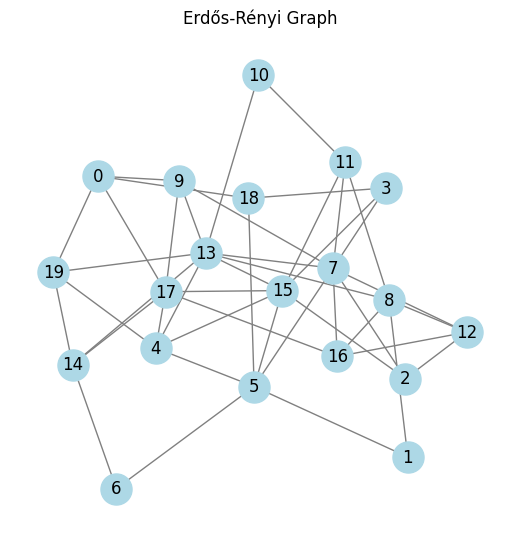

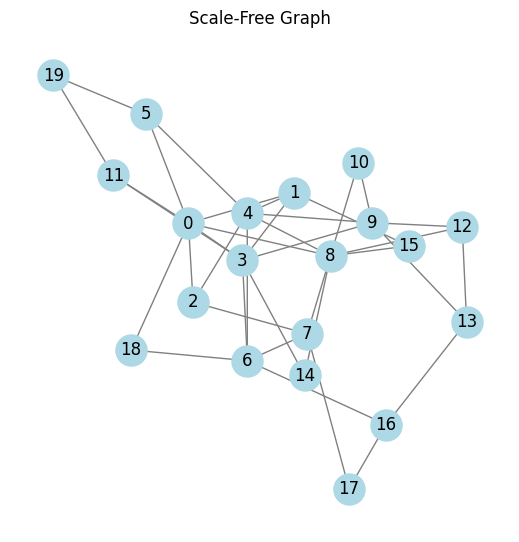

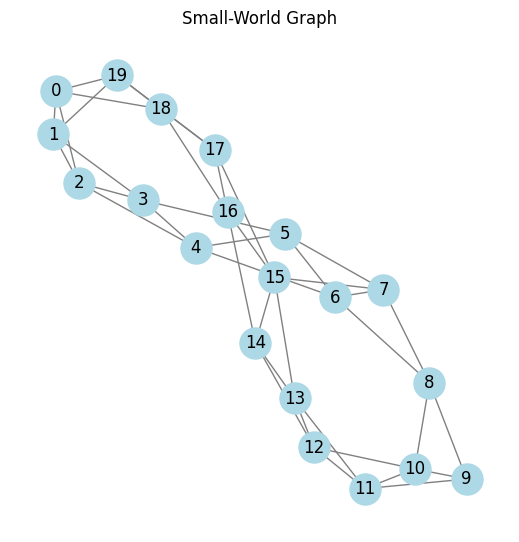

In [6]:
# Generate and plot graphs
er, sf, sw = generate_graphs()
plot_graph(er, "Erdős-Rényi Graph")
plot_graph(sf, "Scale-Free Graph")
plot_graph(sw, "Small-World Graph")

Then proceed to extract measurements from them

In [7]:
# Compute measures
data = []
for name, graph in zip(["Erdős-Rényi", "Scale-Free", "Small-World"], [er, sf, sw]):
    data.append([
        name,
        degree_distribution(graph),
        clustering_coefficient(graph),
        characteristic_path_length(graph)
    ])


And finally see the results

In [8]:
# Create DataFrame and print as a table
df = pd.DataFrame(data, columns=["Graph Type", "Degree Dist. Variance", "Clustering Coeff.", "Char. Path Length"])
print(df.to_string(index=False))


 Graph Type  Degree Dist. Variance  Clustering Coeff.  Char. Path Length
Erdős-Rényi                   3.14           0.162976           2.021053
 Scale-Free                   2.34           0.074762           2.305263
Small-World                   0.10           0.481667           2.684211
